# Analytical toy model - Introductory infos

Toy model in which the snapshots are taken continuously, i.e. not at discrete time steps.

--- 
 
## Content:

- [#1.-Scanner-Object](#1.-Scanner-Object)
- [#2.-Source-detection](#2.-Source-detection)
    - Sirio
    - Vega
    - Proxima Centauri
- [#3.-For-more](#3.-For-more)

---

## Few definitions: (from wikipedia:)
* Attitude:   https://en.wikipedia.org/wiki/Attitude_control
* Parallax:   https://en.wikipedia.org/wiki/Parallax
* B-Spline:   https://en.wikipedia.org/wiki/B-spline
* Quaternion: https://en.wikipedia.org/wiki/Quaternion
* CCD (Charge-Coupled Device): https://en.wikipedia.org/wiki/Charge-coupled_device
* BCRS and GCRS (Barycentric/Geocentric Celestial Reference System): https://en.wikipedia.org/wiki/Barycentric_celestial_reference_system
* TCB (Barycentric Coordinate Time): https://en.wikipedia.org/wiki/Barycentric_Coordinate_Time

In [1]:
# Module import
from IPython.display import Image
import sys

# To use interact -- IPython widget
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# append to path the folder that contains the analytic scanner
sys.path.append('../GaiaLab/scan/analytic_scanner')
# local imports
#from gaia_analytic_toymodel import *
from gaia_analytic_toymodel import Scanner
from gaia_analytic_toymodel import Attitude
from gaia_analytic_toymodel import Source
import constants as const

from analytic_plots import*

# Ipython magics
%load_ext autoreload
%autoreload 2
# %matplotlib notebook # for pseudo interactive plots

# Set some user-specific variables
# MAIN_FOLDER = '../' # relative path to project folder
# FIG_FOLDER = 'figures/' # relative path to figure

**About the frames we will use**  

Here is an image representing the frames:


<img src="figures/nls_angles.png" />

Figure 1. Definition of angles $\epsilon$, $\lambda$, $\nu$, $\xi$, and $\Omega$ in the nominal scanning law.

The nominal scanning law of Gaia is described by the following angles:
* $\epsilon$: obliquity of equator. This is a $\it{constant}$ chosen to be 23º 26' 21.448''
* $\xi$: revolving angle. At any time the z axis is at this $\it{constant}$ angle from $\vec{s}$. For Gaia, the current choice is 55º.
* $\lambda_{s}(t)$: nominal longitud of the sun in the ecliptic plane. This is chosen to have a constant speed: $\dot{\lambda}(t) = \frac{2\pi}{365}$ 
* $\nu(t)$: revolving phase. Gives a nearly constant precession rate.
* $\Omega(t)$: spin phase. 

Frames of referenced used:
* Interial Frame: $\textbf{G} = \big[ \textbf{l},\textbf{m},\textbf{n}\big]$
* Celestial frame of reference (ort): $\textbf{N} = \big[ \textbf{l},\textbf{j},\textbf{k}\big]$
* Instrument triad frame (ort): $\textbf{Z} = \big[ \textbf{x},\textbf{y},\textbf{z}\big]$
* Ecliptic triad $\textbf{E}= \big[ \textbf{l},\textbf{j},\textbf{k}\big]$ 

Given by:
$$
\textbf{k} = \textbf{n}cos(\epsilon) - \textbf{m} sin(\epsilon) \\ 
\textbf{j} = \textbf{m}cos(\epsilon) + \textbf{n} sin(\epsilon) \\ \textbf{s}=\textbf{l}cos(\lambda_{s}(t)) + \textbf{j} sin(\lambda_{s}(t) 
$$

The total inertial rotation of the telescope is therefore:
$$
\begin{equation}
\vec{\omega} = \textbf{k} \dot{\lambda_{s}} + \textbf{s} \dot{\nu} + \textbf{z} \dot{\Omega}
\end{equation}
$$

The precessional motion of the z-axis is: 

$$
\begin{equation}
\dot{z} = \omega \times z= \big( k \times z\big)\dot{\lambda_{s}} + \big(s \times z\big)\dot{\nu}
\end{equation}
$$

And if we consider the rate of change of the z-axis wrt time to be a constant:
$$
\begin{equation}
\frac{dz}{dt}\frac{dt}{d\lambda_{s}} = \frac{dz}{dt} \dot{\lambda_{s}}^{-1} = S
\end{equation}$$



And keeping the condition $ \|\big( k \times z \big)\|^{2} = 1 - sin^{2}(\xi)sin^{2}(\nu)$ then the following ODE for $\nu$ is obtained:

$$
\begin{equation}
\dot{\nu} = \dot{\lambda_{s}}\frac{\sqrt{S^{2} - cos^{2}(\nu)} + cos(\xi)sin(\nu)}{sin(\xi)}
\end{equation}
$$

Taking the positive sign of the square root implying increasing $\nu$.
Then, for constant inertial spin rate about the z axis using the equation for the inertial rotation $\omega$, we obtain:
$$
\begin{equation}
\dot{\Omega} = \omega_{z} - \dot{\nu}cos\xi - \dot\lambda_{s}sin\xi sin\nu
\end{equation}
$$

To see how does the longitude and latitude of the z axis changes with time, according to Figure 1, the geometry gives the following equations in the ecliptic plane:
$$
\begin{equation}
\lambda_{z}(t) = \lambda_{s}(t) + arctan\big[ tan\xi cos\nu(t) \big]. \\
\beta_{z}(t) = arcsin \big[ sin\xi sin\nu(t) \big].
\end{equation}
$$

Frames of referenced used:
* Celestial Frame: $\textbf{G} = \big[ \textbf{l},\textbf{m},\textbf{n}\big]$
* Instrument Frame: $\textbf{Z} = \big[ \textbf{x},\textbf{y},\textbf{z}\big]$
* Barycentric Reference System $\textbf{BCRS}= \big[ \textbf{l'},\textbf{m'},\textbf{n'}\big]$ 

The BCRS is a frame of reference that has its axis all parallel to G-Frame, but that is displaced by 1AU. That is to say, it is the frame centered at the sun.

# 1. Scanner Object

In [2]:
tf_gen = 365*2  

In [3]:
#Create the gaia object. 
#By default, the time for the satellite operating is of 5 years and the creation of data to feed the splines for every hour.
gaia = Attitude(ti=0, tf=tf_gen, dt= 1/24.)

In [4]:
sirio = Source("sirio", 101.28, -16.7161, 379.21, -546.05, -1223.14, -7.6)

In [6]:
sirio.set_time('a')

TypeError: t is not a float or int but instead <class 'str'>.

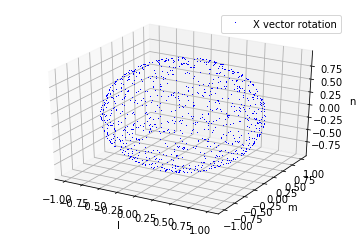

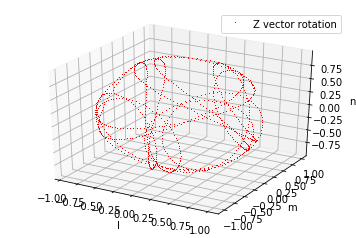

In [4]:
plot_3D_scanner_pos(gaia, 'X', 0, tf_gen, 1000)
plot_3D_scanner_pos(gaia, 'Z', 0, tf_gen, 1000)

Now we plot the time evolution of the attitude components, begining at $t=0$ up to $t=80$ days. 


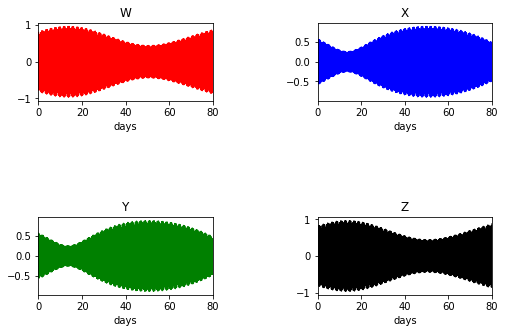

In [5]:
plot_attitude(gaia, 0, 80)

# 2. Source detection

Create three example stars from real data. The Source object takes as inputs:

> Source('name', $\alpha$, $\delta$, parallax, $\mu_{\alpha}$, $\mu_{\delta}$, $\mu_{r}$)

with units: [string, deg, deg, mas, mas/yr, mas/yr, km/s]



Once the satellite and its correspondent attitude object is created, we need to create a scanner. At the moment, the scaner is only able to perform the search of one single star in the sky. 

The scanner takes in two parameters. The first does a scan of the sky taking the dot product of the x-axis of the scanner (with respect to the LMN-frame) and the star's position (also in LMN). Since the scanning law has an almost perfect coverage of the sky (would be interesting to do a density plot of where it scans more in the future), it selects the times when the star is in this circle field of view. For this example we set it to 20 deg. The second input parameters sets the z-axis value threshold for the scanner ccd dimentions. That is to say, the height of the scanning line that swaps the sky. 

## 2.1 Sirio

Firstly, the coarse scan is performed, using the desire satellite and the star that we want to scan.
Secondly, we search for the optimized solutions with the fine scan, which uses the data from the coarse scan.

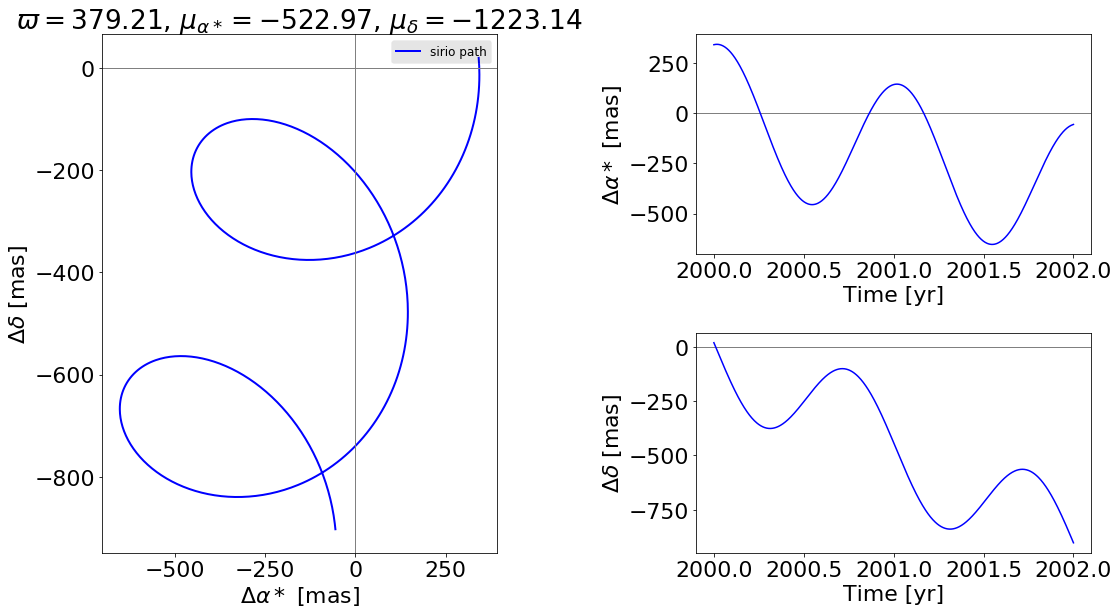

In [6]:
sirio = Source("sirio", 101.28, -16.7161, 379.21, -546.05, -1223.14, -7.6)

#Plot of the star trayectory from G-frame 
#(i.e. at a point moment around the sun in ecliptic plane in circular orbit of 1 AU).
plot_stars_trajectory(sirio, gaia)

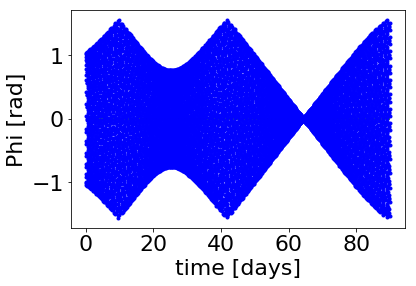

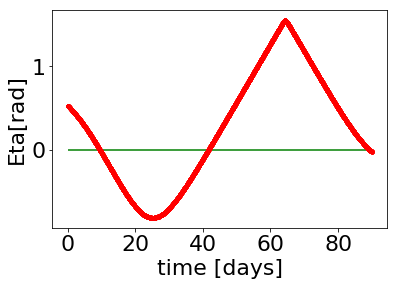

In [7]:
plot_phi(sirio, gaia, ti=0, tf=90, n=10000)

In [8]:
def myFunc(day):
    p = plot_eta_over_phi_day(source=sirio, att=gaia, ti=0, tf=90, day=day)

interact(myFunc, day=(0,90))

interactive(children=(IntSlider(value=45, description='day', max=90), Output()), _dom_classes=('widget-interac…

<function __main__.myFunc(day)>

#### Now the scanner

In [9]:
scanSirio = Scanner(np.radians(30), np.radians(1))

```
delta_t_for = scanSirio.wide_coarse_double_scan(gaia, sirio, ti=0, tf=80)

delta_t_no_for = scanSirio.wide_coarse_double_scan2(gaia, sirio, ti=0, tf=80)

print('no for loop: ',delta_t_no_for)

print('for_loop: ',delta_t_for)
```

In [10]:
lsls

NameError: name 'lsls' is not defined

In [ ]:
scanSirio.start(gaia, sirio, tf=200)

In [ ]:
scanSirio.roots

In [ ]:
len(scanSirio.obs_times)

In [ ]:
plot_observations(sirio, gaia, scanSirio)

In [ ]:
def my_func(tf):
    scanSirio.start(gaia, sirio, tf=tf)
    plot_observations(sirio, gaia, scanSirio)
interact(my_func, tf=widgets.IntSlider(min=0,max=1500,step=100,value=100))

The red dots represent the calculated position of the observations. The yellow bars are the erros in the z-axis of the scanner for each position-observation, and the green ones the error bars for the y-axis of the scanner.

## 2.2 Vega

In [ ]:
vega = Source("vega", 279.2333, 38.78, 128.91, 201.03, 286.23, -13.9)

In [ ]:
plot_stars_trajectory(vega, gaia)

In [ ]:
scanVega = Scanner(np.radians(30), np.radians(1))

In [ ]:
scanVega.start(gaia, vega)

In [ ]:
#len(scanVega.times_fine_scan)

In [ ]:
plot_observations(vega, gaia, scanVega)

## 2.3 Proxima Centauri

In [ ]:
proxima = Source("proxima",217.42, -62, 768.7, 3775.40, 769.33, 21.7)

In [ ]:
plot_stars_trajectory(proxima, gaia)

In [ ]:
scanProxima = Scanner(np.radians(30), np.radians(1))

In [ ]:
scanProxima.start(gaia, proxima)

In [ ]:
len(scanProxima.times_fine_scan)

In [ ]:
plot_observations(proxima, gaia, scanProxima)

# 3. For more

Thank you for reading! 
For more about this project, visit the other notebooks as well as the gaia website.

For any errors or remarks, don't hesitate to contact us!